Importing the required Library


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
source = './german_credit_data.csv'
df = pd.read_csv(source, encoding='ascii', delimiter=',')

In [4]:
print("German Data")
df.head()

German Data


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Dataset Information

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None


In [6]:
print(df.describe(include='all'))


         Unnamed: 0          Age   Sex          Job Housing Saving accounts  \
count   1000.000000  1000.000000  1000  1000.000000    1000             817   
unique          NaN          NaN     2          NaN       3               4   
top             NaN          NaN  male          NaN     own          little   
freq            NaN          NaN   690          NaN     713             603   
mean     499.500000    35.546000   NaN     1.904000     NaN             NaN   
std      288.819436    11.375469   NaN     0.653614     NaN             NaN   
min        0.000000    19.000000   NaN     0.000000     NaN             NaN   
25%      249.750000    27.000000   NaN     2.000000     NaN             NaN   
50%      499.500000    33.000000   NaN     2.000000     NaN             NaN   
75%      749.250000    42.000000   NaN     2.000000     NaN             NaN   
max      999.000000    75.000000   NaN     3.000000     NaN             NaN   

       Checking account  Credit amount     Duration

Removing the unwanted Column

In [ ]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)


Finding All null Values in Dataset 


In [8]:
print(df.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


Removing the Null entries because it can effect our model accuracy

In [14]:
df.dropna(inplace=True)

In [15]:
print(df.isnull().sum())

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


Changing the type of Columns

In [16]:
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [17]:
print(df.dtypes)

Age                    int64
Sex                 category
Job                    int64
Housing             category
Saving accounts     category
Checking account    category
Credit amount          int64
Duration               int64
Purpose             category
dtype: object


In [19]:
numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df)

     Age  Job  Credit amount  Duration
1     22    2           5951        48
3     45    2           7882        42
4     53    2           4870        24
7     35    3           6948        36
9     28    3           5234        30
..   ...  ...            ...       ...
989   48    1           1743        24
993   30    3           3959        36
996   40    3           3857        30
998   23    2           1845        45
999   27    2           4576        45

[522 rows x 4 columns]


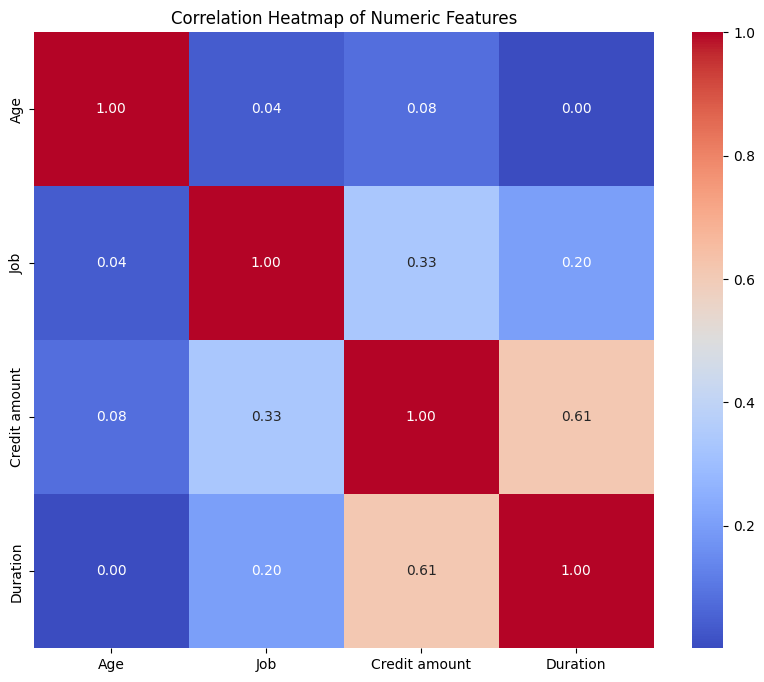

In [20]:
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

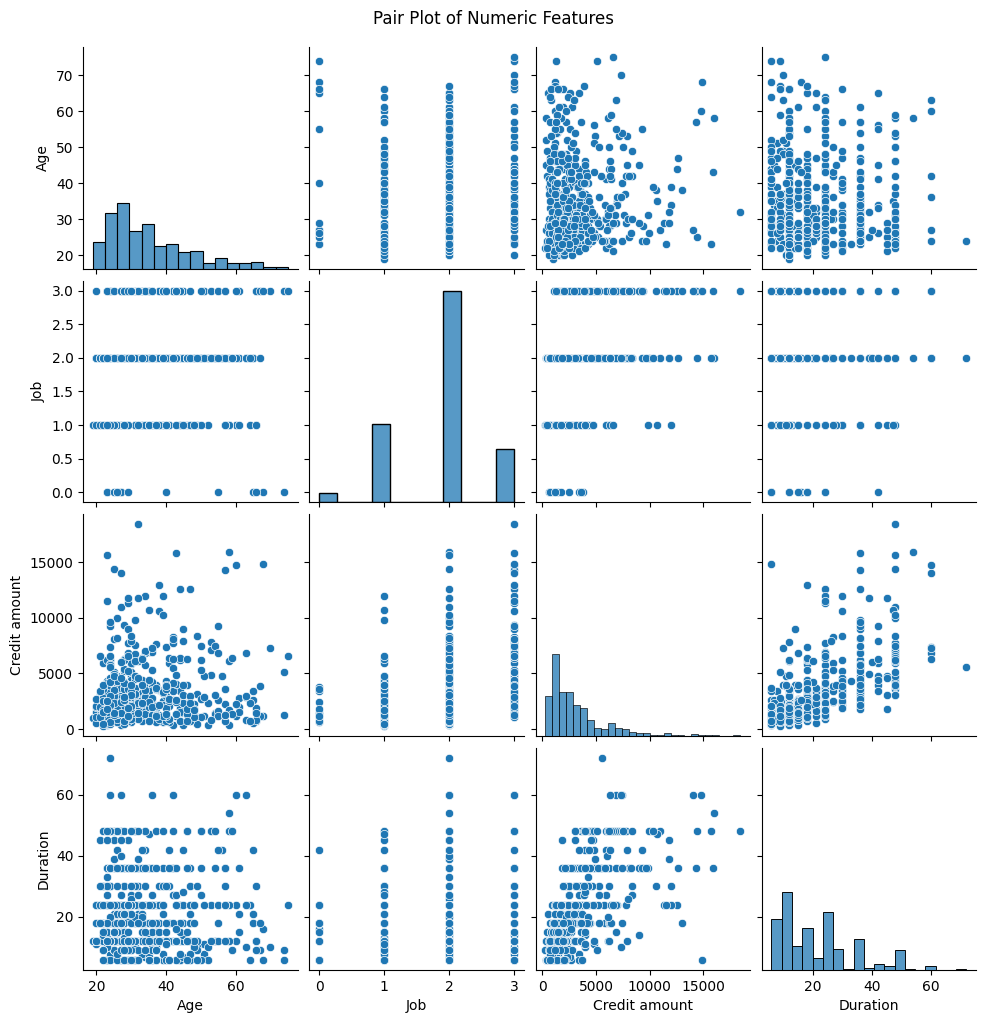

In [21]:
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

Histogram for visualization

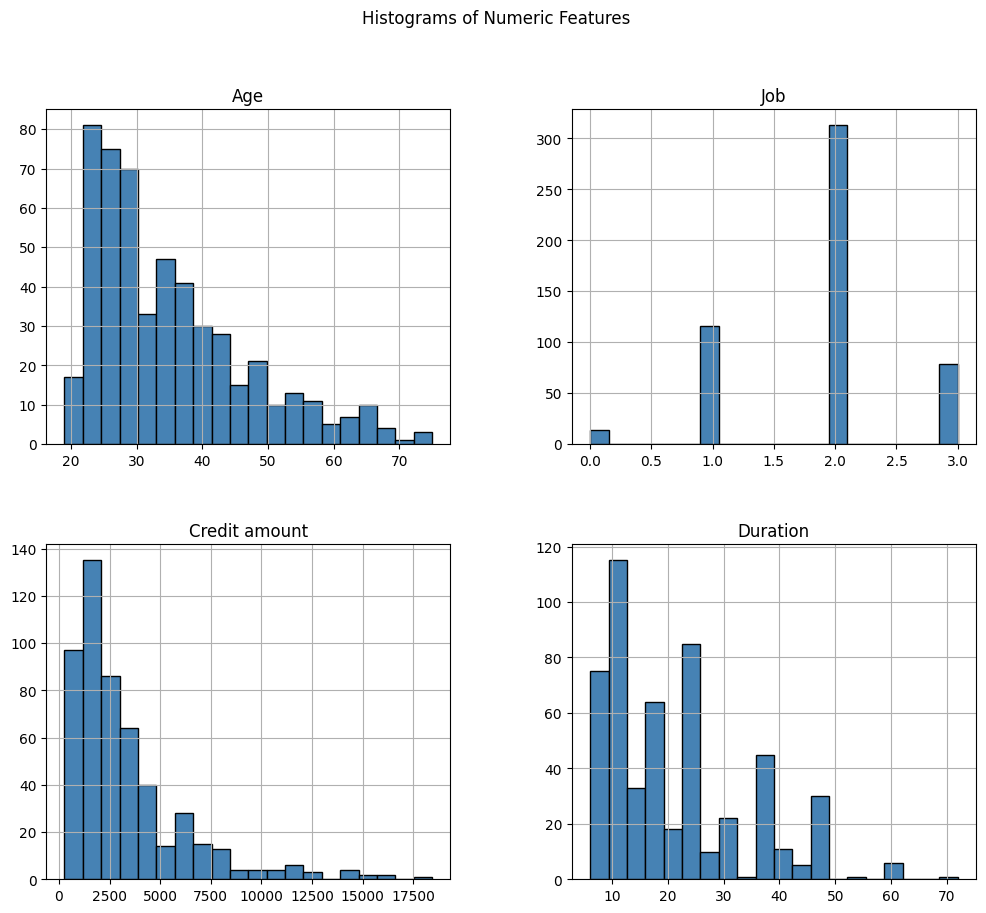

In [22]:
numeric_df.hist(figsize=(12, 10), bins=20, color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

Graph to compare or visualize the count of sex

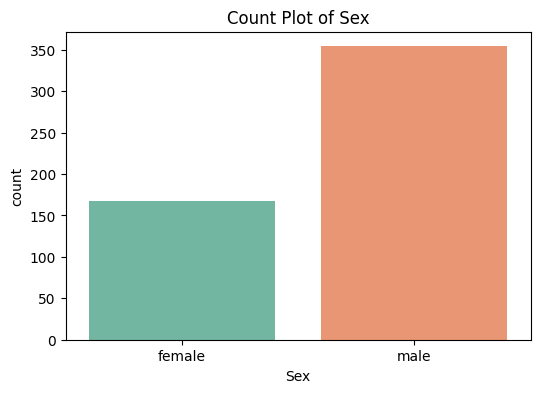

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Count Plot of Sex')
plt.show()

C:\Users\AMAN BISHT\AppData\Local\Temp\ipykernel_12948\1649181854.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Housing', y=np.ones(len(df)), data=df, estimator=lambda x: len(x), ci=None, palette='Set3')


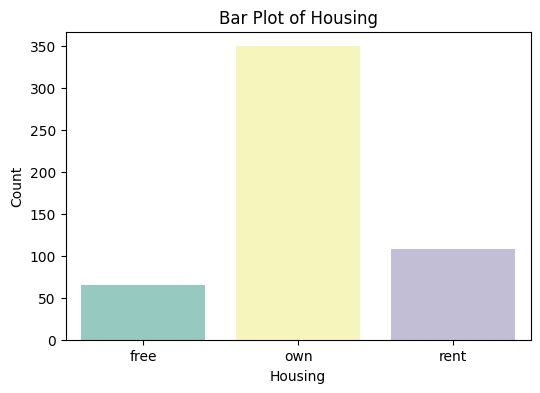

In [24]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Housing', y=np.ones(len(df)), data=df, estimator=lambda x: len(x), ci=None, palette='Set3')
plt.title('Bar Plot of Housing')
plt.ylabel('Count')
plt.show()



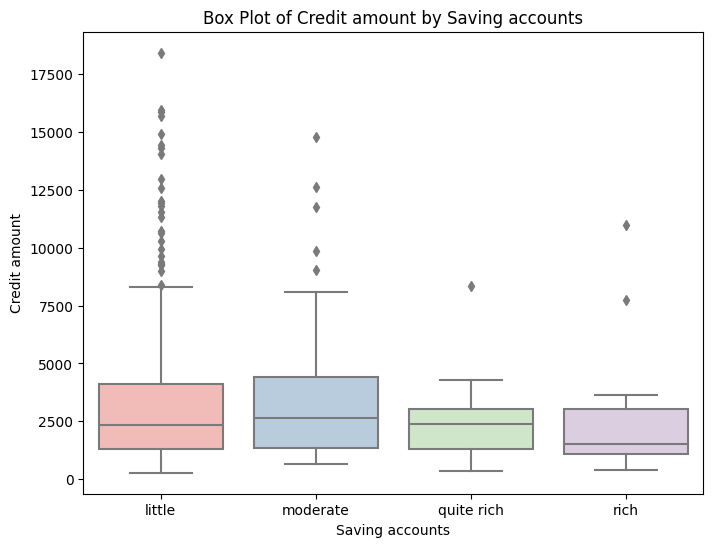

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Saving accounts', y='Credit amount', data=df, palette='Pastel1')
plt.title('Box Plot of Credit amount by Saving accounts')
plt.show()

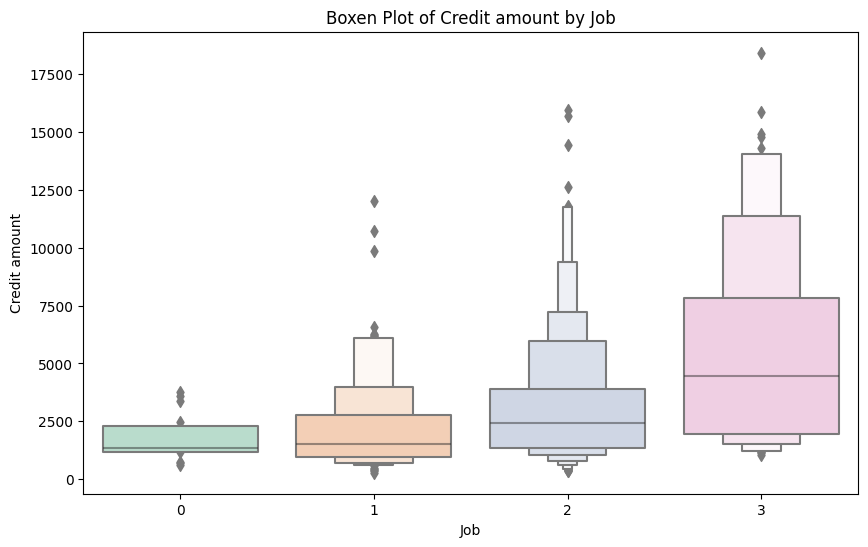

In [26]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Job', y='Credit amount', data=df, palette='Pastel2')
plt.title('Boxen Plot of Credit amount by Job')
plt.show()

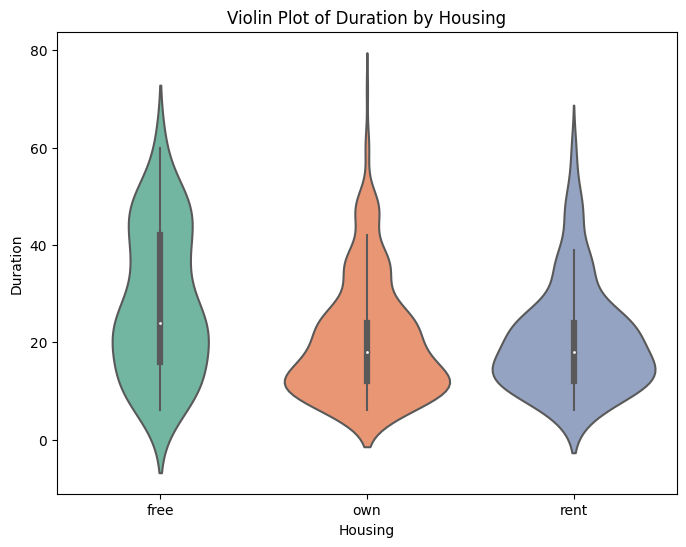

In [27]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Housing', y='Duration', data=df, palette='Set2')
plt.title('Violin Plot of Duration by Housing')
plt.show()

C:\Users\AMAN BISHT\AppData\Local\Temp\ipykernel_12948\272084565.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Sex', y='Age', data=df, jitter=True, palette='Set1')


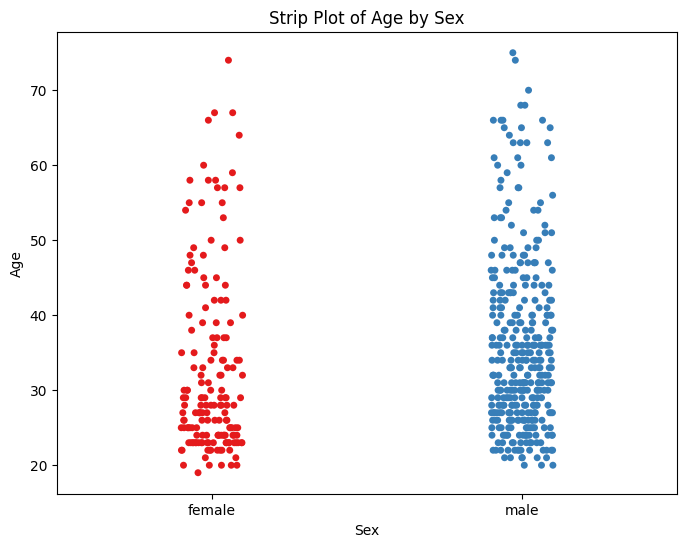

In [28]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Sex', y='Age', data=df, jitter=True, palette='Set1')
plt.title('Strip Plot of Age by Sex')
plt.show()

Since the dataset does not contain a target variable, we are creating a new target column to facilitate model training.

In [29]:
median_credit = df['Credit amount'].median()
df['HighCredit'] = (df['Credit amount'] > median_credit).astype(int) 

In [30]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,HighCredit
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,1
7,35,male,3,rent,little,moderate,6948,36,car,1
9,28,male,3,own,little,moderate,5234,30,car,1


In [31]:
df.describe

<bound method NDFrame.describe of      Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
1     22  female    2     own          little         moderate           5951   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
7     35    male    3    rent          little         moderate           6948   
9     28    male    3     own          little         moderate           5234   
..   ...     ...  ...     ...             ...              ...            ...   
989   48    male    1     own          little         moderate           1743   
993   30    male    3     own          little           little           3959   
996   40    male    3     own          little           little           3857   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           45

Counting the values of '1' and '0'.

In [33]:
df['HighCredit'].value_counts()

1    261
0    261
Name: HighCredit, dtype: int64

Distributing the data into feature and target

In [34]:
features = ['Age', 'Job', 'Duration', 'Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
X = df[features]
y = df['HighCredit']

Performing One Hot encoding

In [35]:
X = pd.get_dummies(X, drop_first=True)

Spliting the Data into Train and Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Applying the Logistic Regression model.

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Generating predictions from our trained machine learning model.

In [38]:
y_pred = model.predict(X_test)

Evalution Matrix:

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")
print(f'Prediction Accuracy: {accuracy:.2f}')

Precision: 0.74
Recall:    0.73
F1-Score:  0.74
Prediction Accuracy: 0.74


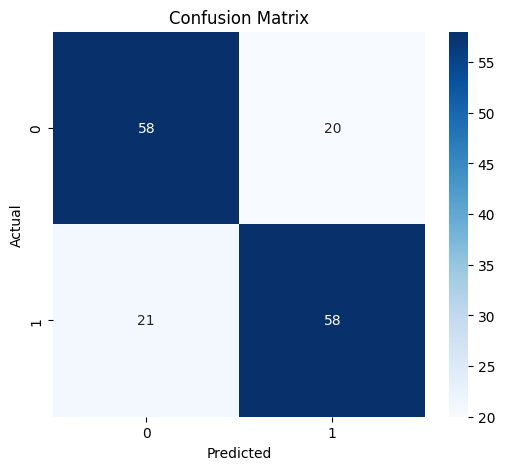

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Optimizing the model by cross Validation. Spliting the data 80% and 20% and then from the 80% of the data again spliting it to train and test

In [50]:
df_main, df_holdout = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
b = df_main["HighCredit"]
a = df_main.drop(columns=['HighCredit'])

In [58]:
a = pd.get_dummies(a, drop_first=True)

In [53]:
b.head()

429    0
123    0
708    0
581    1
328    1
Name: HighCredit, dtype: int32

Splitting the 80% data into training and testing sets.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [57]:
X_test.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
194,21,male,2,rent,moderate,moderate,3031,45,radio/TV
499,28,male,2,own,moderate,rich,1323,6,car
31,27,male,2,own,little,little,4020,24,furniture/equipment
268,45,male,3,own,little,little,8978,14,car
7,35,male,3,rent,little,moderate,6948,36,car


In [45]:
print("Train set size:", df_train.shape)
print("Test set size: ", df_test.shape)
print("Holdout set size:", df_holdout.shape)

Train set size: (333, 10)
Test set size:  (84, 10)
Holdout set size: (105, 10)


Model Creation

In [60]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\AMAN BISHT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Model Prediction

In [61]:
y_pred = model.predict(X_test)

X_train evaluation matrix

In [62]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")
print(f'Prediction Accuracy: {accuracy:.2f}')

Precision: 0.98
Recall:    0.98
F1-Score:  0.98
Prediction Accuracy: 0.98


In [63]:
cm = confusion_matrix(y_test, y_pred)

Cross Validating over the holdout data

In [64]:
y = df_holdout["HighCredit"]
x = df_holdout.drop(columns=['HighCredit'])

In [65]:
x = pd.get_dummies(x, drop_first=True)

In [66]:
y_pred = model.predict(x)

Model Evalution matrix

In [71]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")
print(f'Prediction Accuracy: {accuracy:.2f}')

Precision: 1.00
Recall:    1.00
F1-Score:  1.00
Prediction Accuracy: 1.00
